# Model Selection

1. K-Fold Cross Validation Technique
    * Measure & most relevant way to evaluate ML models.
    
2. Grid Search
    * Finding optimal hyperparameters.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Preparation

In [17]:
df = pd.read_csv('data/social_network_ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [18]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training with Kernel SVM

In [21]:
from sklearn.svm import SVC

cls = SVC(kernel='rbf', random_state=0)
cls.fit(X_train, y_train)

SVC(random_state=0)

### Evaluations

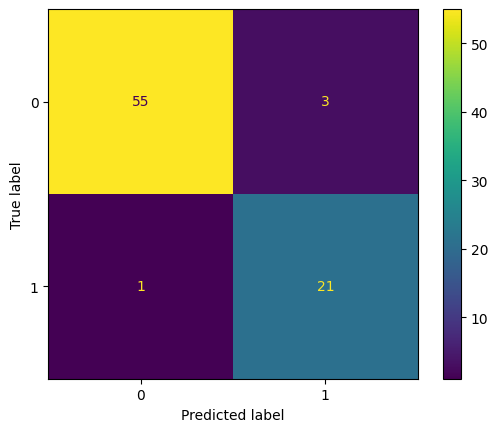

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

y_preds = cls.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [23]:
accuracy_score(y_test, y_preds)

0.95

### Applying k-fold Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(
                    estimator=cls, 
                    X=X_train,
                    y=y_train, 
                    cv=10)
print('Accuracy: {:.2f} %'.format(np.mean(accuracies) * 100))
print('Standard Deviation: {:.2f} %'.format(np.std(accuracies) * 100))

Accuracy: 90.00 %
Standard Deviation: 4.80 %


### Applying GridSearchCV to find the best hyperparameters

In [25]:
# Using Kernel SVM, we want to tune its hyperparameters

# C - Regularization to reduce overfitting, the lower the C, the stronger the regularization.
# kernel - linear, rbf
# gamma - for rbf, we tune different gamma

from sklearn.model_selection import GridSearchCV

# 2 different kernels as gamma can only be used with rbf & not linear
parameters = [{'C': [0.25, 0.5, 0.75, 1],
               'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1],
               'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4,  0.5, 0.6, 0.7, 0.8, 0.9]}] 

# n_jobs = -1 -> all processors to be used
gs = GridSearchCV(estimator=cls, param_grid = parameters, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print('Accuracy: {:.2f} %'.format(best_accuracy * 100))
print('Best Parameters:', best_parameters)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Accuracy: 90.62 %
Best Parameters: {'C': 0.25, 'gamma': 0.8, 'kernel': 'rbf'}


### Test Results Visualizations

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, cls.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test Set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend();